In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\suman\PROJECTS\Target_Phase2_Search_Term_Clustering\data v2.xlsx"
dataset = pd.read_excel(path)

In [4]:
dataset.head(25)

,search_terms,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,$1 gift cards,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,$2 gift cards,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,$5 gift cards,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,$5 gift cards,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,kindle,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
5,0-3 month boy clothes,41294.0,66016.0,43532.0,38650.0,36968.0,39170.0,33404.0,30646.0,27269.0,...,35244.0,30758.0,31273.0,27630.0,152460.0,95613.0,103174.0,79931.0,73285.0,82744.0
6,00 flour,5082.0,5514.0,4694.0,2307.0,4756.0,2023.0,4190.0,4384.0,4472.0,...,1839.0,1831.0,1912.0,1668.0,14725.0,9074.0,13609.0,11795.0,10916.0,10720.0
7,0w-20 full synthetic oil,8715.0,16052.0,5634.0,4944.0,5310.0,6216.0,5664.0,7493.0,5473.0,...,13645.0,13031.0,12689.0,12653.0,47209.0,31921.0,36472.0,36895.0,36852.0,37507.0
8,1 1/2 inch binders 3 ring,38608.0,38373.0,30555.0,25724.0,21829.0,32557.0,23357.0,28714.0,36553.0,...,23670.0,23234.0,21263.0,20803.0,91654.0,65868.0,93186.0,71744.0,66519.0,77834.0
9,1 1/2 inch curling iron,6643.0,11388.0,10998.0,10074.0,6626.0,4615.0,8430.0,9124.0,6342.0,...,8247.0,6525.0,8301.0,7172.0,56565.0,39709.0,47004.0,38452.0,33137.0,35352.0


In [5]:
updated_dataset = dataset.iloc[:,1:]

In [6]:
#KNN Imputation for dataset 
imputer = KNNImputer()
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9],
}
scoring = {
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2',
    'Explained Variance': 'explained_variance',
    'Median Absolute Error': 'neg_median_absolute_error',
}
grid_search = GridSearchCV(imputer, parameters, scoring=scoring, refit='MSE', cv=5)
grid_search.fit(updated_dataset)
updated_dataset = imputer.fit_transform(updated_dataset)

C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _PredictScorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
           

C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _PredictScorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
           

In [7]:
results = grid_search.cv_results_

In [8]:
best_hyperparams = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
cv_results = grid_search.cv_results_
print("Best Hyperparameters,model,score:", best_hyperparams,best_model,best_score)

Best Hyperparameters,model,score: {'n_neighbors': 1} KNNImputer(n_neighbors=1) nan


In [9]:
updated_dataset

array([[72848. , 57156. ,  1099. , ..., 24340. , 21677. , 19287. ],
       [ 8067. ,  9288. ,  4099. , ...,  4380. ,  6482. ,  8623. ],
       [ 2914. ,  7470. ,  4816.2, ...,  3074. ,  4556. ,  6626. ],
       ...,
       [ 4562. ,  4597. ,  5007. , ...,  4305. ,  2044. ,  3551. ],
       [ 7652. , 13750. , 12949. , ..., 53899. , 66497. , 54400. ],
       [11790. ,  7143. , 10164. , ...,  4853. ,  4322. ,  8392. ]])

In [10]:
#if updated dataset is in form of numpy array
updated_dataset = pd.DataFrame(updated_dataset)

In [11]:
def report_nulls(dataset):
    null_counts = dataset.isnull().sum()
    print("No of nulls for each column is \n",null_counts)
    total_count = null_counts.sum()
    print("Total count of nulls is \n",total_count)

In [12]:
report_nulls(updated_dataset)

No of nulls for each column is 
 0     0
1     0
2     0
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Length: 62, dtype: int64
Total count of nulls is 
 0


In [13]:
#updated dataset structure
updated_dataset

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,4816.2,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


# Preprocessing and Feature Reduction 1 - Consider 3 consecutive months

Calculating the Average of Growth Rate for 3 consecutive months 
(Referred from https://in.indeed.com/career-advice/career-development/how-to-calculate-growth-rate )
This source mentions an example
""""""
To calculate the average annual growth rate over several years, you can use the method of average growth rate over time:
List the number of condensed milk cans sold by the company in the past four years:

2018 = 350
2019 = 450
2020 = 500
2021 = 650
Next, calculate the company's average annual growth rate.

So, if the present value is 650, the past value is 350 and the number of years is 4, you get:

Growth rate after 2018: (450 - 350) / 350 x 100 = 28.57%
Growth rate after 2019: (500 - 450) / 450 x 100 = 11.11%
Growth rate after 2020: (650 - 500) / 500 x 100 = 30%
Average growth rate over time = (28.57% + 11.11% + 30%) / 3 = 23.22% per year"""""""""

In [14]:
Maximum_frequency_overall = 0
for i in range(updated_dataset.shape[0]):
    Maximum_frequency_overall = max(max(updated_dataset.iloc[i,:]),Maximum_frequency_overall)

In [15]:
print(Maximum_frequency_overall)

38787682.0


In [16]:
def calculate_min_frequency(sample_idx):
    return min(updated_dataset.iloc[sample_idx,:])

In [17]:
def calculate_min_frequency_sample(sample):
    return min(sample)

In [18]:
calculate_min_frequency(0)

1099.0

In [166]:
updated_dataset

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,4816.2,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [167]:
from scipy import stats
def zscore(data, z_threshold=2):
    z_scores = np.abs(stats.zscore(data))
    return data[(z_scores < z_threshold).all(axis=1)]

In [168]:
updated_dataset2 = zscore(updated_dataset.iloc[:,1:])

In [189]:
#using this same equation, calculating growth rate for 3 consecutive months and averaging values
updated_dataset2 = pd.DataFrame(columns=["search_terms","3months_1","3months_2","3months_3","3months_4","3months_5"]) 
num_rows = updated_dataset.shape[0]
c = 0 
while(c < num_rows):
    updated_dataset2.loc[c,"search_terms"] = dataset.iloc[c,0] 
    idx = 1
    for i in range(0,59,12):
        np_array = np.array(updated_dataset.iloc[c,i:i+12]) 
        #print("search term, array, index ",np_array,i)
        growth_rate_for_sample_c = 0
        for j in range(1,np_array.shape[0]):
            growth_rate_for_sample_c += ((np_array[j-1]-np_array[j])/np_array[j])*100
        #print(updated_dataset2.iloc[:,:],((np_array[j-1]-np_array[j])/np_array[j])*100)
        updated_dataset2.loc[c,"3months_"+str(idx)] = growth_rate_for_sample_c / np_array.shape[0]
        #print(updated_dataset2.iloc[:,:])
        idx += 1    
    c += 1

In [20]:
updated_dataset2 = pd.DataFrame(columns=updated_dataset2.columns)

In [190]:
updated_dataset2.iloc[:50,:2]

,search_terms,3months_1
0,$1 gift cards,432.922304
1,$2 gift cards,4.944161
2,$5 gift cards,58.738779
3,$5 gift cards,20.919606
4,kindle,3.316022
5,0-3 month boy clothes,2.798908
6,00 flour,18.983275
7,0w-20 full synthetic oil,5.541011
8,1 1/2 inch binders 3 ring,1.291965
9,1 1/2 inch curling iron,11.74005


# Kmeans Clustering for 3months_1

In [191]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1 = MinMaxScaler()
dataset_scaled1 = pd.DataFrame(scaler1.fit_transform(updated_dataset2.iloc[:,1:2]))

In [192]:
dataset_scaled1

,0
0,0.344753
1,0.024421
2,0.064685
3,0.036378
4,0.023202
...,...
15785,0.021474
15786,0.021303
15787,0.023651
15788,0.017064


In [193]:
from sklearn.cluster import KMeans
wcss2 = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataset_scaled1.iloc[:,:]) 
    wcss2.append(kmeans.inertia_)

C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [194]:
def time_series_plot(term,data):
    plt.figure(figsize=(18, 9))
    sample = np.array(data[data.iloc[:,0] == term])[0]
    fig, ax = plt.subplots()
    for p in range(1,len(sample)):
        print(sample[p])
        dataframe = pd.DataFrame({'x_values': data.columns[1:],'y_values': [sample[p] for p in range(1,len(sample))]})
        ax.plot(dataframe.x_values, dataframe.y_values)
    txt = "Line Plot for search term : "+ term
    ax.set_title(txt)
    ax.set_xlabel("3 consecutive Months")
    ax.set_ylabel("Growth rate percentage per week(if the percentage is more then growth increases)")
    ax.legend()
    plt.show()

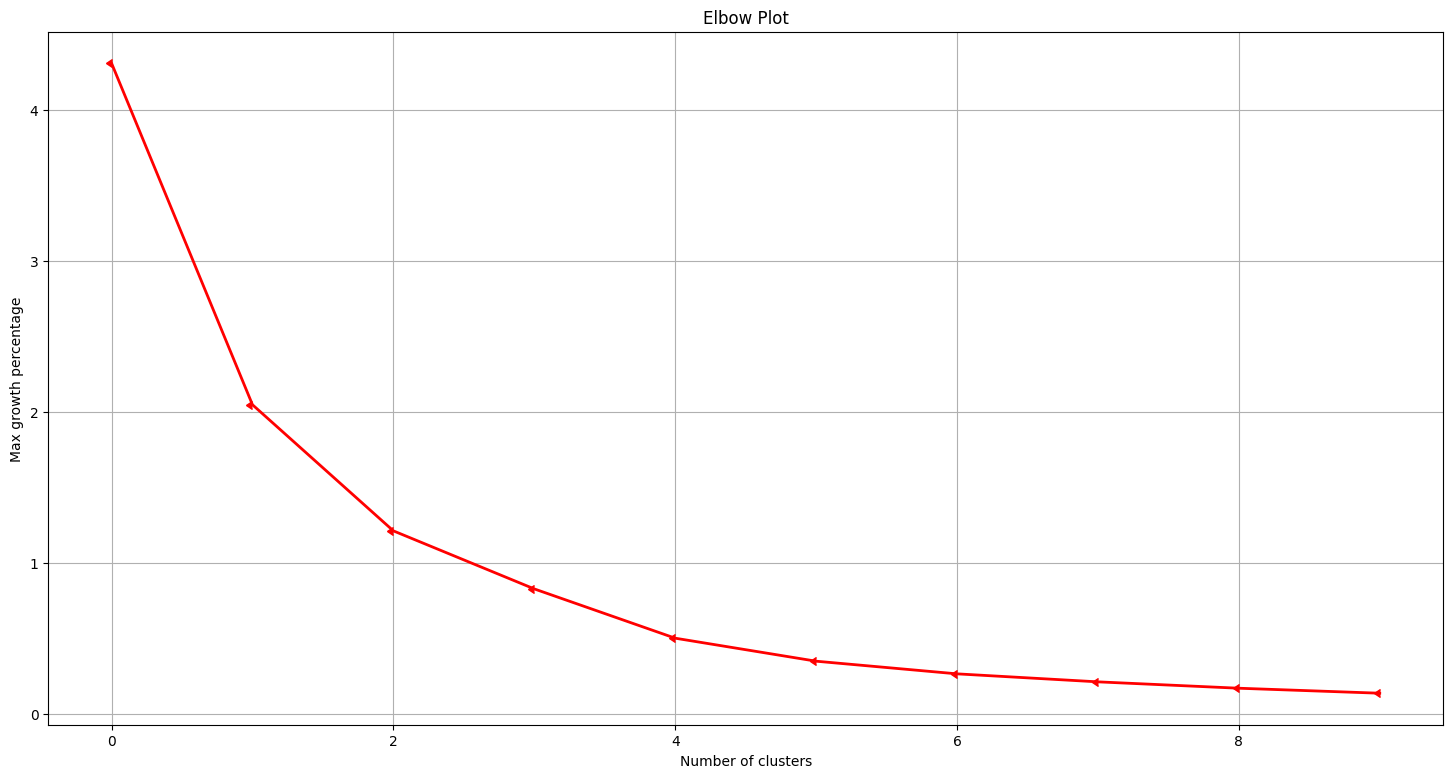

In [195]:
plt.figure(figsize=(18, 9))
dataframe = pd.DataFrame({'x_values': [i for i in range(len(wcss2))],'y_values': [i for i in wcss2]})
plt.plot(dataframe.x_values, dataframe.y_values, linewidth=2, color='red', marker=8)
txt = "Elbow Plot"
plt.title(txt)
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Max growth percentage")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3.3160219232179515
6.268020087809614
27.320974718636062
8.864721229672455
1.1660591335633292


<Figure size 1800x900 with 0 Axes>

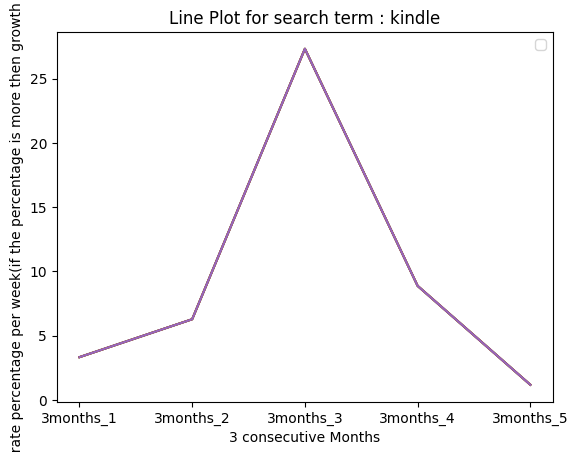

In [196]:
time_series_plot("kindle",updated_dataset2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


432.9223041935051
152.24095386841893
76.44533362615256
48.87717277420875
19.309144372897226


<Figure size 1800x900 with 0 Axes>

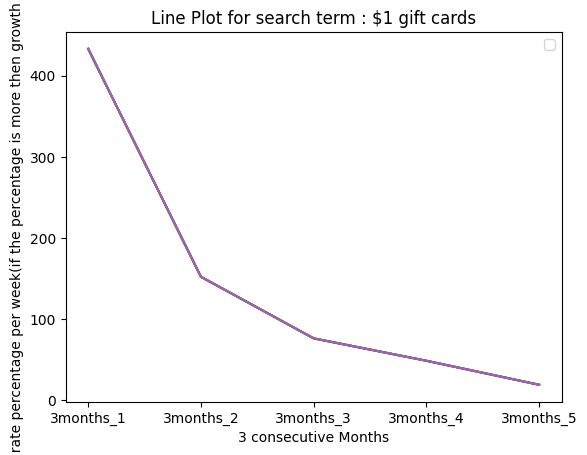

In [197]:
time_series_plot("$1 gift cards",updated_dataset2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0065267344177302
77.70067113669951
12.00909734947529
3.368707366460082
-5.78962165542859


<Figure size 1800x900 with 0 Axes>

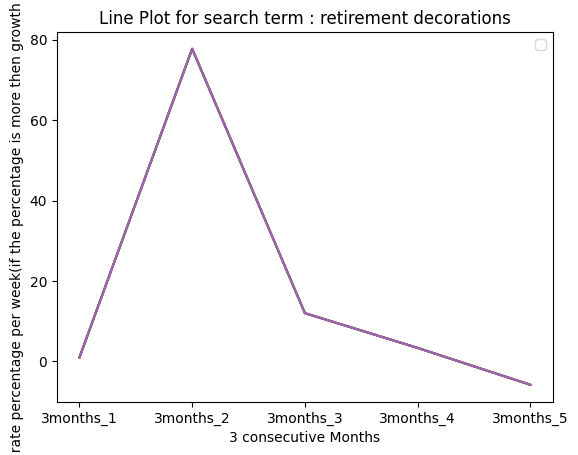

In [198]:
time_series_plot("retirement decorations",updated_dataset2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4.5723085179768
9.597157872823898
-1.5905349983732096
15.931929993046898
2.3817230965807212


<Figure size 1800x900 with 0 Axes>

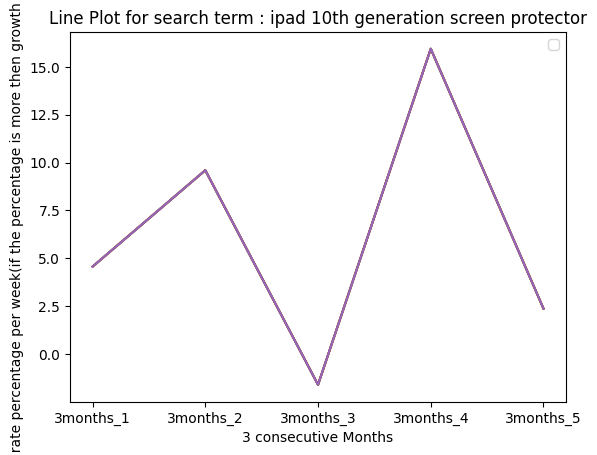

In [199]:
time_series_plot("ipad 10th generation screen protector",updated_dataset2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-4.884425862889569
9.646385016759863
11.95929278202915
8.412644938361582
-3.218911500905006


<Figure size 1800x900 with 0 Axes>

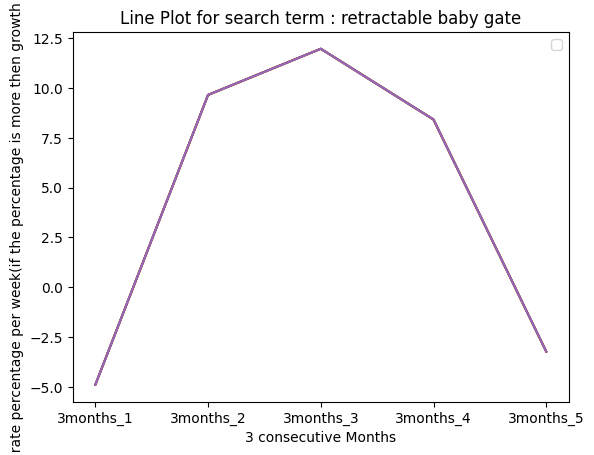

In [200]:
time_series_plot("retractable baby gate",updated_dataset2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7.120624958515479
5.602293931661698
10.532315696886917
-2.2327592576120185
-1.0306105508384635


<Figure size 1800x900 with 0 Axes>

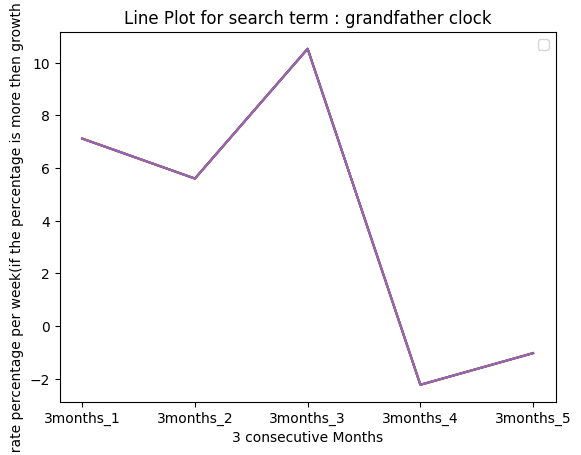

In [201]:
time_series_plot("grandfather clock",updated_dataset2)

# KMeans Clustering

In [72]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(updated_dataset2.iloc[:,1:]))

In [73]:
dataset_scaled

,0,1,2,3,4
0,0.200390,0.079749,0.014388,0.070033,0.008986
1,0.017893,0.034738,0.009612,0.033381,0.005275
2,0.066066,0.009110,0.010284,0.028539,0.006103
3,0.019491,0.058892,0.030877,0.040292,0.056307
4,0.009340,0.018157,0.006720,0.021706,0.022276
...,...,...,...,...,...
15785,0.009695,0.037084,0.005886,0.025707,0.014987
15786,0.016635,0.012997,0.005632,0.029829,0.013689
15787,0.015791,0.015466,0.009117,0.037595,0.012286
15788,0.012952,0.013563,0.007048,0.042897,0.023761


In [74]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataset_scaled.iloc[:,1:]) 
    wcss.append(kmeans.inertia_)

C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

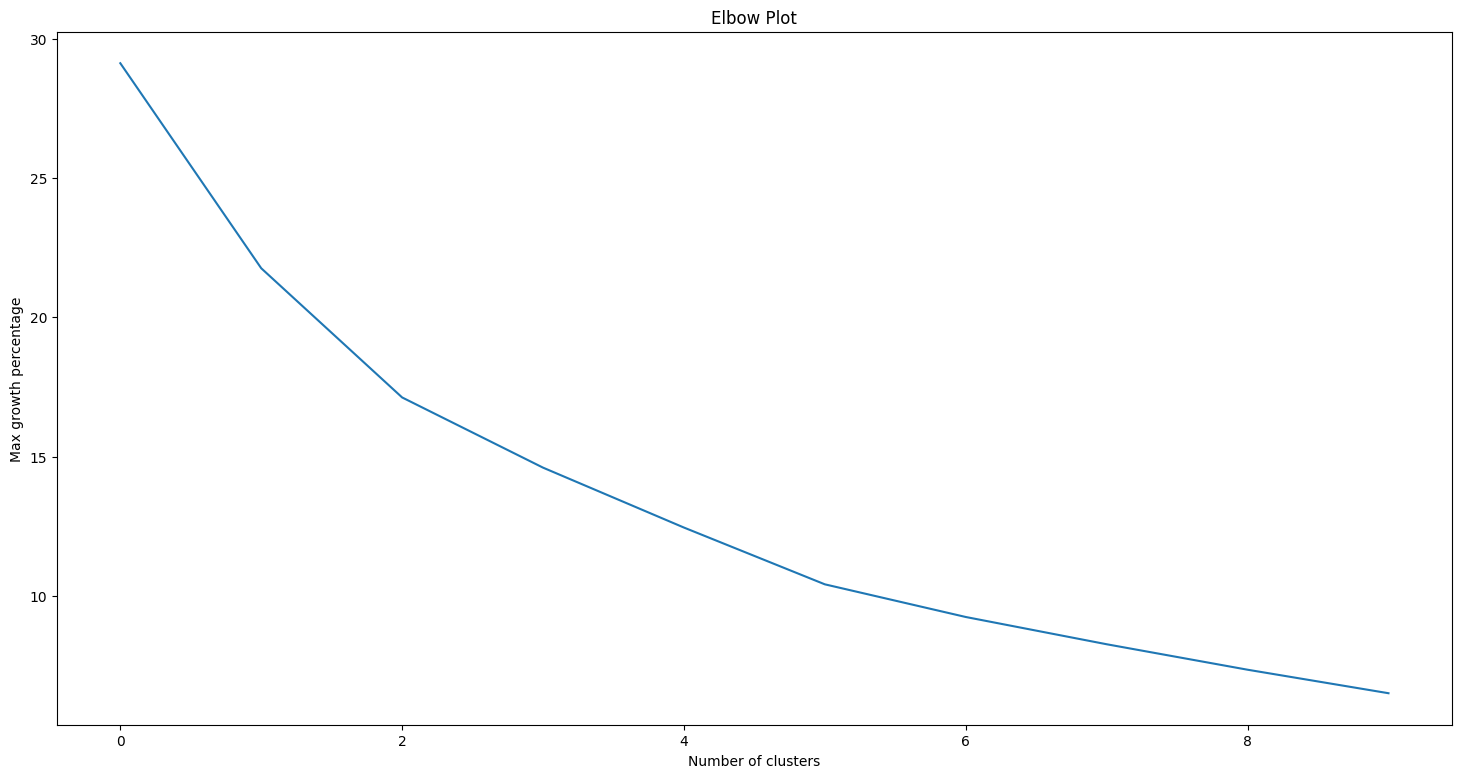

In [75]:
plt.figure(figsize=(18, 9))
dataframe = pd.DataFrame({'x_values': [i for i in range(len(wcss))],'y_values': [i for i in wcss]})
plt.plot(dataframe.x_values, dataframe.y_values)
txt = "Elbow Plot"
plt.title(txt)
plt.xlabel("Number of clusters")
plt.ylabel("Max growth percentage")
plt.show()

# HDBSCAN clustering

In [154]:
pip install hdbscan

                                              0.0/694.1 kB ? eta -:--:--
     -                                     30.7/694.1 kB 660.6 kB/s eta 0:00:02
     ---                                   61.4/694.1 kB 825.8 kB/s eta 0:00:01
     ------                                 122.9/694.1 kB 1.0 MB/s eta 0:00:01
     ---------                              174.1/694.1 kB 1.1 MB/s eta 0:00:01
     --------------                         256.0/694.1 kB 1.2 MB/s eta 0:00:01
     ---------------                        276.5/694.1 kB 1.1 MB/s eta 0:00:01
     ------------------                     337.9/694.1 kB 1.1 MB/s eta 0:00:01
     ----------------------                 409.6/694.1 kB 1.2 MB/s eta 0:00:01
     ----------------------                 409.6/694.1 kB 1.2 MB/s eta 0:00:01
     ----------------------                 409.6/694.1 kB 1.2 MB/s eta 0:00:01
     -----------------------------          542.7/694.1 kB 1.1 MB/s eta 0:00:01
     ---------------------------------      614

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\suman\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [39]:
updated_dataset2.iloc[:,1:]

,3months_1,3months_2,3months_3,3months_4,3months_5
0,580.174769,169.268586,37.267529,87.610231,6.566876
1,31.158363,63.72953,16.88995,24.648646,-5.91227
2,176.079253,3.639672,19.759548,16.332032,-3.127642
3,35.967047,120.363348,107.611133,36.520633,165.700603
4,5.427668,24.852873,4.5514,4.59322,51.258426
...,...,...,...,...,...
15785,6.495277,69.232318,0.993209,11.466393,26.74819
15786,27.374418,12.755309,-0.08995,18.547151,22.381587
15787,24.834902,18.542661,14.77784,31.887418,17.663818
15788,16.295504,14.081352,5.950678,40.996692,56.25268


In [40]:
data_temp = updated_dataset2.iloc[:,1:].astype(np.float64)

In [41]:
data_temp

,3months_1,3months_2,3months_3,3months_4,3months_5
0,580.174769,169.268586,37.267529,87.610231,6.566876
1,31.158363,63.729530,16.889950,24.648646,-5.912270
2,176.079253,3.639672,19.759548,16.332032,-3.127642
3,35.967047,120.363348,107.611133,36.520633,165.700603
4,5.427668,24.852873,4.551400,4.593220,51.258426
...,...,...,...,...,...
15785,6.495277,69.232318,0.993209,11.466393,26.748190
15786,27.374418,12.755309,-0.089950,18.547151,22.381587
15787,24.834902,18.542661,14.777840,31.887418,17.663818
15788,16.295504,14.081352,5.950678,40.996692,56.252680


In [ ]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size = 4)
hdbscan.fit(data_temp)

# DBSCAN Clustering

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [76]:
#normalize the data
dataset_normalized = normalize(dataset_scaled)

In [77]:
dataset_normalized = pd.DataFrame(dataset_normalized)

In [78]:
dataset_normalized

,0,1,2,3,4
0,0.881242,0.350708,0.063275,0.307978,0.039518
1,0.340503,0.661058,0.182913,0.635236,0.100388
2,0.898610,0.123908,0.139887,0.388185,0.083015
3,0.198980,0.601203,0.315214,0.411324,0.574817
4,0.247036,0.480247,0.177732,0.574112,0.589188
...,...,...,...,...,...
15785,0.198333,0.758669,0.120406,0.525908,0.306608
15786,0.421917,0.329655,0.142837,0.756551,0.347191
15787,0.341674,0.334637,0.197262,0.813447,0.265835
15788,0.244509,0.256035,0.133041,0.809795,0.448546


In [452]:
pca = PCA(n_components=2)
dataset_principal = pd.DataFrame(pca.fit_transform(dataset_normalized))

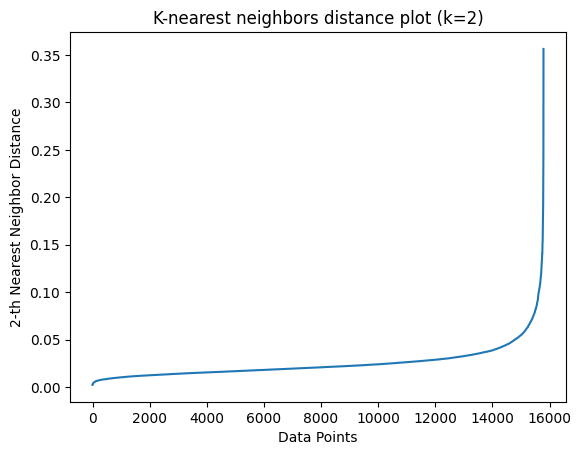

optimal eps value is :  0.27034026494225755


In [79]:
#finding suitable eps value
from sklearn.neighbors import NearestNeighbors
k = 2
neigh = NearestNeighbors(n_neighbors=k)
distances, _ = neigh.fit(dataset_normalized).kneighbors(dataset_normalized)
k_distances = np.sort(distances[:, -1]) 
diff_distances = np.diff(k_distances)
second_derivative = np.diff(diff_distances)

knee_index = np.argmax(second_derivative) + 1
optimal_eps = k_distances[knee_index]
# Plot the k-nearest neighbors distance
plt.plot(k_distances)
plt.xlabel("Data Points")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title(f"K-nearest neighbors distance plot (k={k})")
plt.show()
print("optimal eps value is : ",optimal_eps)

In [116]:

dbscan_clustering = DBSCAN(eps=0.090,min_samples=6).fit_predict(dataset_normalized)

In [117]:
set(list(dbscan_clustering))

{-1, 0, 1, 2}

In [118]:
print("cluster 0 and outliers and cluster 1 and cluster 2 cluste 3 count : ",list(dbscan_clustering).count(0),list(dbscan_clustering).count(-1),list(dbscan_clustering).count(1),list(dbscan_clustering).count(2))

cluster 0 and outliers and cluster 1 and cluster 2 cluste 3 count :  15356 422 6 6


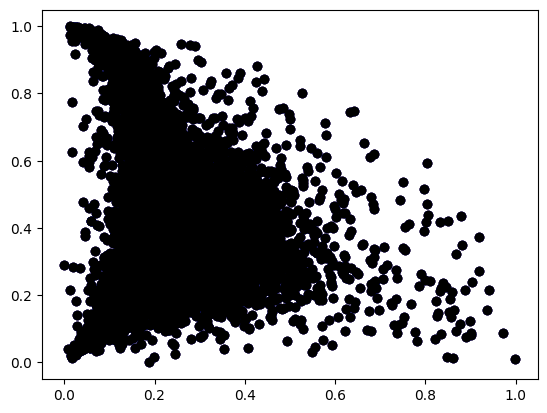

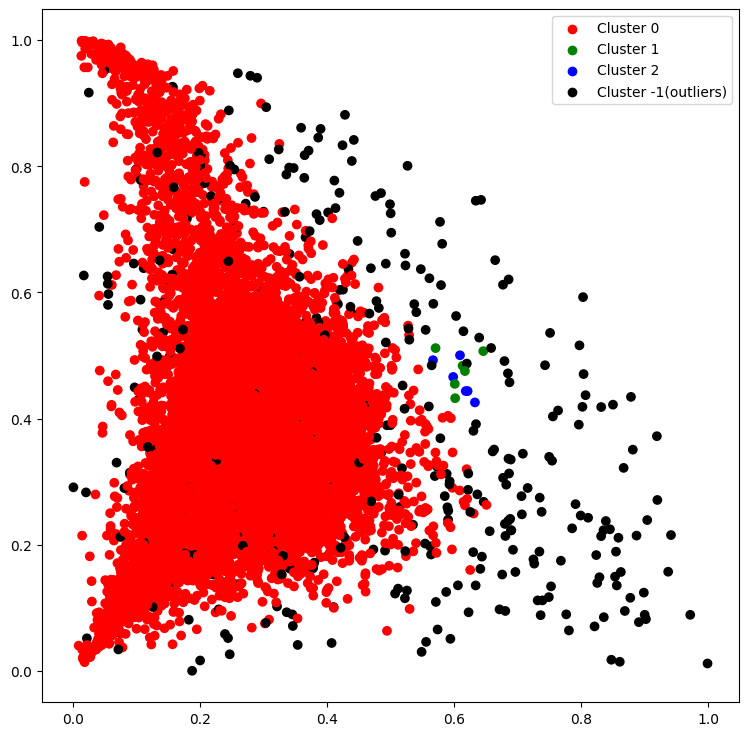

In [120]:
colours = {-1:'k',0:'r',1:'b',2:'g'}
r = plt.scatter(dataset_normalized[0], dataset_normalized[1], color ='r');
g = plt.scatter(dataset_normalized[0], dataset_normalized[1], color ='g');
b = plt.scatter(dataset_normalized[0], dataset_normalized[1], color ='b');
k = plt.scatter(dataset_normalized[0], dataset_normalized[1], color ='k');
plt.figure(figsize =(9, 9))
plt.scatter(dataset_normalized[0], dataset_normalized[1], c = [colours[label] for label in DBSCAN(eps=0.090,min_samples=6).fit(dataset_normalized).labels_])
plt.legend((r, g, b, k), ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster -1(outliers)'))
plt.show()

In [ ]:
colours = {-1:'k',0:'r',1:'b',2:'g'}
r = plt.scatter(dataset_principal[0], dataset_principal[1], color ='r');
g = plt.scatter(dataset_principal[0], dataset_principal[1], color ='g');
b = plt.scatter(dataset_principal[0], dataset_principal[1], color ='b');
k = plt.scatter(dataset_principal[0], dataset_principal[1], color ='k');
plt.figure(figsize =(9, 9))
plt.scatter(dataset_principal[0], dataset_principal[1], c = [colours[label] for label in DBSCAN(eps=0.069,min_samples=3).fit(dataset_principal).labels_])
plt.legend((r, g, b, k), ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster -1(outliers)'))
plt.show()

In [ ]:
np.unique(label, return_counts=True)

# Clustering without PCA

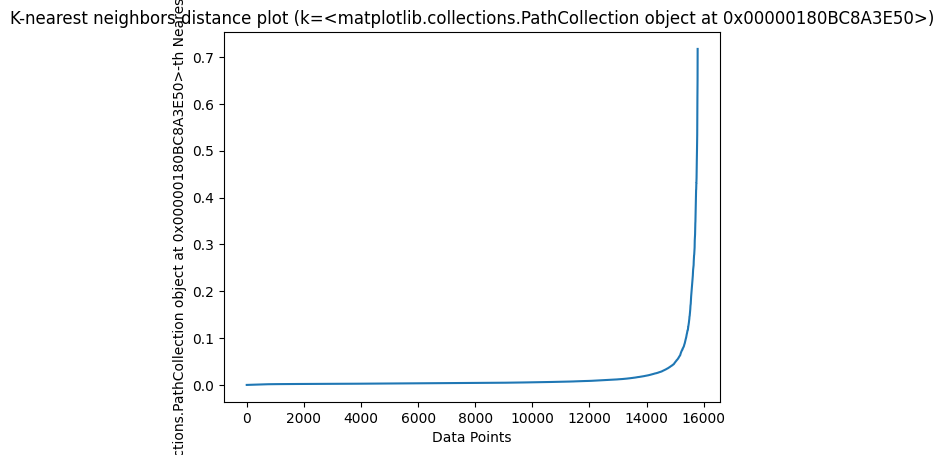

optimal eps value is :  0.6501273775473365


In [366]:
#finding suitable eps value
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
distances, _ = neigh.fit(dataset_normalized).kneighbors(dataset_normalized)
k_distances = np.sort(distances[:, -1]) 
diff_distances = np.diff(k_distances)
second_derivative = np.diff(diff_distances)

knee_index = np.argmax(second_derivative) + 1
optimal_eps = k_distances[knee_index]
# Plot the k-nearest neighbors distance
plt.plot(k_distances)
plt.xlabel("Data Points")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title(f"K-nearest neighbors distance plot (k={k})")
plt.show()
print("optimal eps value is : ",optimal_eps)

In [367]:
dataset_normalized

,0,1,2,3,4
0,0.141986,-0.362027,-0.483481,-0.544219,-0.564667
1,-0.444695,-0.438012,-0.448845,-0.486031,-0.415577
2,-0.384168,-0.469222,-0.450171,-0.484861,-0.441023
3,0.427519,0.471547,0.486366,0.429562,0.416887
4,-0.451374,-0.474326,-0.392088,-0.472154,-0.441151
...,...,...,...,...,...
15785,-0.464979,-0.356734,-0.454779,-0.481158,-0.467117
15786,-0.473239,-0.422721,-0.432936,-0.465679,-0.439388
15787,-0.457920,-0.448211,-0.466824,-0.445416,-0.416049
15788,-0.461207,-0.449204,-0.426010,-0.458297,-0.440436


In [368]:
dbscan_clustering2 = DBSCAN(eps=0.6128056362886278,min_samples=3).fit_predict(dataset_normalized)

In [369]:
set(list(dbscan_clustering2))

{-1, 0}

# PCA for all Features

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [211]:
X = updated_dataset
scaler3 = StandardScaler()
X_scaled = scaler3.fit_transform(X)

X_normalized = normalize(X_scaled)
 
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
 
X_principal.head()

,P1,P2
0,0.903647,0.028079
1,-0.212197,0.074967
2,-0.353662,-0.046967
3,1.240747,0.507103
4,-0.355934,-0.033184


In [212]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

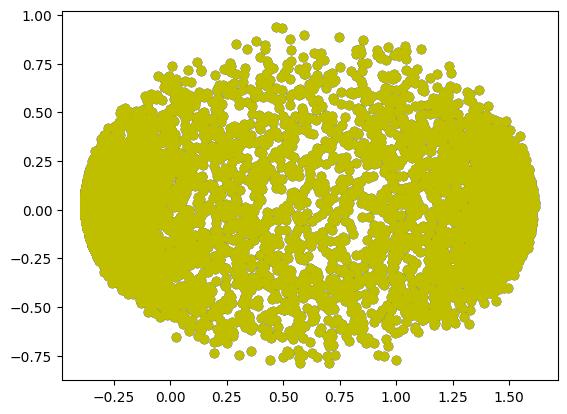

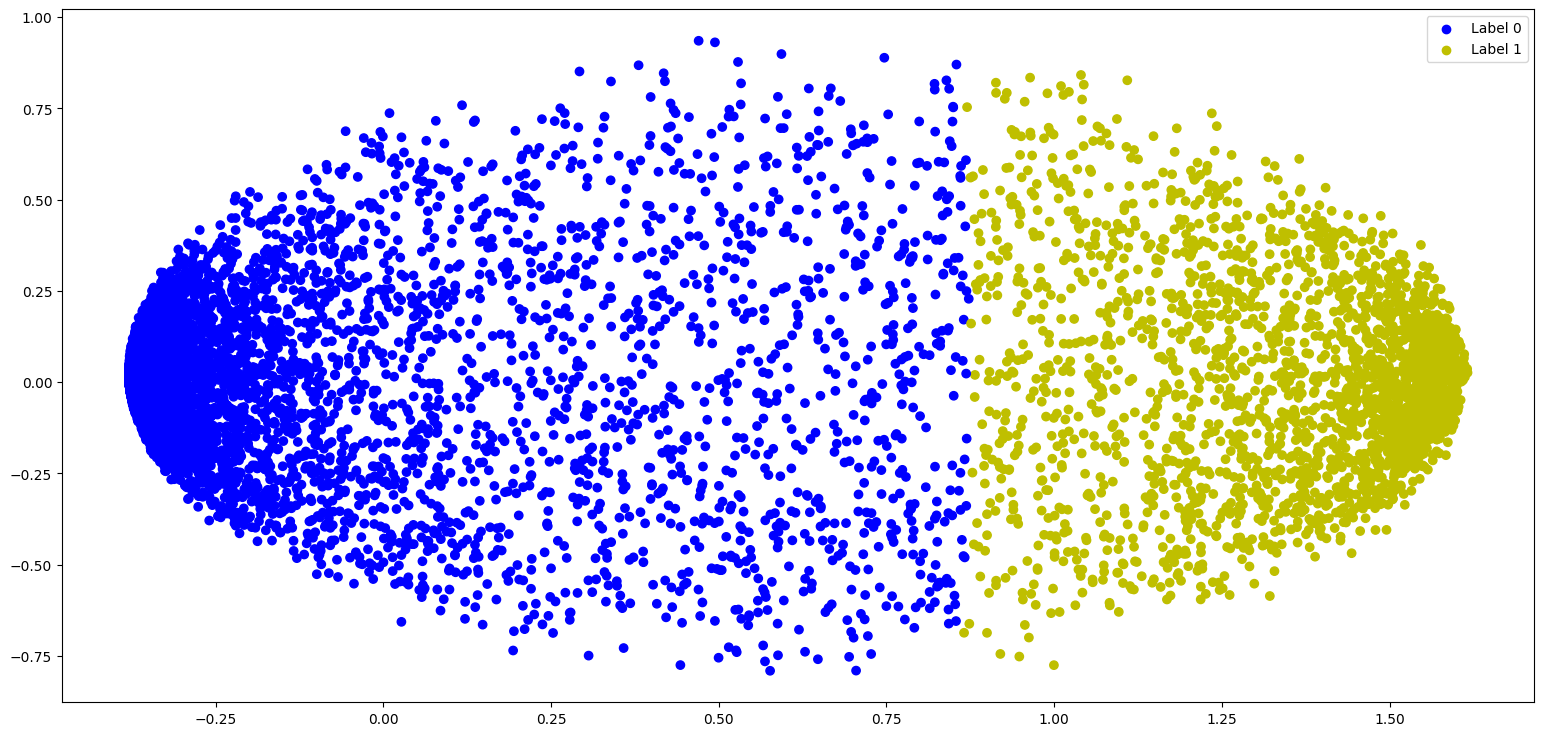

In [215]:
colours = {}
colours[0] = 'b'
colours[1] = 'y'
cvec = [colours[label] for label in labels_rbf]
 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
 
plt.figure(figsize =(19, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [217]:
labels_rbf[0:1000]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [218]:
dataset1 = updated_dataset

In [219]:
dataset1

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,4816.2,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0
